In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
all_data = pd.read_csv('user_actor_movie.csv')  # 读取数据

In [3]:
all_data.head()

,userId,movieId,rating,timestamp,Animation_x,History_x,Fantasy_x,Crime_x,Comedy_x,TV Movie_x,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2.0,339.0,5.0,8.670413e+08,0.0,3.500000,3.250000,3.000000,2.250000,0.0,...,0,0,0,0,0,0,0,0,1,0
1,6335.0,339.0,4.0,1.437329e+09,3.5,3.000000,3.642857,3.583333,3.177419,5.0,...,0,0,0,0,0,0,0,0,1,0
2,7816.0,339.0,4.0,8.280211e+08,0.0,4.000000,3.666667,3.666667,3.600000,0.0,...,0,0,0,0,0,0,0,0,1,0
3,9487.0,339.0,4.0,1.346099e+09,0.0,2.250000,3.100000,3.000000,3.444444,4.0,...,0,0,0,0,0,0,0,0,1,0
4,10382.0,339.0,3.0,8.299326e+08,0.0,3.666667,3.666667,3.409091,3.814815,0.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
all_data.columns.values.tolist()

['userId',
 'movieId',
 'rating',
 'timestamp',
 'Animation_x',
 'History_x',
 'Fantasy_x',
 'Crime_x',
 'Comedy_x',
 'TV Movie_x',
 'Western_x',
 'Family_x',
 'Action_x',
 'War_x',
 'Mystery_x',
 'Music_x',
 'Adventure_x',
 'Drama_x',
 'Foreign_x',
 'Thriller_x',
 'Horror_x',
 'Science Fiction_x',
 'Documentary_x',
 'Romance_x',
 '点度中心性',
 '紧密中心性',
 '介数中心性',
 'Romance_y',
 'Fantasy_y',
 'Action_y',
 'Thriller_y',
 'Crime_y',
 'Horror_y',
 'History_y',
 'Music_y',
 'Animation_y',
 'Western_y',
 'Mystery_y',
 'Adventure_y',
 'TV Movie_y',
 'Documentary_y',
 'Comedy_y',
 'War_y',
 'Science Fiction_y',
 'Family_y',
 'Drama_y',
 'Foreign_y',
 'Panama',
 'France',
 'Hungary',
 'Ethiopia',
 'Gibraltar',
 'Egypt',
 'Costa Rica',
 'New Zealand',
 'Senegal',
 'Cameroon',
 'Cambodia',
 'Kenya',
 'Samoa',
 'Peru',
 'Barbados',
 'Bangladesh',
 'Czechoslovakia',
 'Iceland',
 'Lebanon',
 'Papua New Guinea',
 'Switzerland',
 "Cote D'Ivoire",
 'Martinique',
 'Ireland',
 'East Germany',
 'Tunisia',
 'J

In [10]:
from sklearn.model_selection import train_test_split
X = all_data[['点度中心性','紧密中心性','介数中心性']]
y = all_data['rating']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=980)

In [11]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train).reshape(len(y_train),1)
y_test=np.array(y_test).reshape(len(y_test),1)

In [12]:
x_train.shape

(3082, 3)

In [13]:
# 每个批次的大小
n_train = x_train.shape[0]
p_train = x_train.shape[1]
n_test = x_test.shape[0]
p_test = x_test.shape[1]
batch_size = 10
# 计算一共有多少个批次
n_batch =n_train // batch_size

In [14]:
import tensorflow as tf

In [16]:
# print(tf.__path__) #在tf2下使用了tf1的API
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [17]:
#创建一个神经网络层
def add_layer(input,in_size,out_size,activation_function=None):
    """
    :param input: 数据输入
    :param in_size: 输入大小
    :param out_size: 输出大小
    :param activation_function: 激活函数（默认没有）
    :return:output：数据输出
    """
    Weight=tf.Variable(tf.random_normal([in_size,out_size]) )
    biases=tf.Variable(tf.zeros([1,out_size]) +0.1 )
    W_mul_x_plus_b=tf.matmul(input,Weight) + biases
    #根据是否有激活函数
    if activation_function == None:
        output=W_mul_x_plus_b
    else:
        output=activation_function(W_mul_x_plus_b)
    return output

In [18]:
# 输入维度
p_train = 3

In [19]:
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,p_train])
y = tf.placeholder(tf.float32,[None,1])

In [20]:
#定义第一个隐藏层
# 激活函数为sigmoid
hidden_layer1=add_layer(x,3,1,activation_function=tf.nn.sigmoid)
# #定义第二个隐藏层
hidden_layer2=add_layer(hidden_layer1,1,1,activation_function=tf.nn.sigmoid)
# #定义第三个隐藏层
hidden_layer3=add_layer(hidden_layer2,1,1,activation_function=tf.nn.sigmoid)
#定义一个输出层
prediction=add_layer(hidden_layer3,1,1,activation_function=None)

In [21]:
# mse
loss = tf.reduce_mean(tf.losses.mean_squared_error(y,prediction))
# 定义一个梯度下降法来进行训练的优化器 学习率0.2
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

In [22]:
# 计算预测值
def prediction_fun(session,pred_x,prediction,p_train):
    pred_y = []
    for px in pred_x:
        py = prediction.eval(session=session, feed_dict={x: px.reshape(-1,p_train)})
        pred_y.append(py[0][0])
    return pred_y

In [24]:
#####网络训练####
iteras = 200
mloss = np.zeros(iteras)
mloss_train =  np.zeros(iteras)
with tf.Session() as sess:
    sess.run(init)
    # 训练21轮次
    for epoch in range(iteras):
        for batch in range(n_batch):
            ind = range(batch*batch_size,(batch+1)*batch_size)
            #ind = random.sample(range(n),batch_size)
            batch_xs = x_train[ind]
            batch_ys = y_train[ind]
            #batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
            #print(sess.run(W))
        # 用测试数据计算模型的准确率
        mloss_train[epoch] = sess.run(loss,feed_dict={x:x_train,y:y_train})   
        mloss[epoch] = sess.run(loss,feed_dict={x:x_test,y:y_test})       
        print("Iter "+str(epoch)+",Testing Mean Loss "+str(mloss[epoch]))
        if mloss[epoch]<0.5:
            break  
    y_pred = prediction_fun(sess,x_test,prediction,p_train)

Iter 0,Testing Mean Loss 1.2331180572509766
Iter 1,Testing Mean Loss 1.2342054843902588
Iter 2,Testing Mean Loss 1.234207272529602
Iter 3,Testing Mean Loss 1.234207034111023
Iter 4,Testing Mean Loss 1.234207034111023
Iter 5,Testing Mean Loss 1.2342069149017334
Iter 6,Testing Mean Loss 1.2342067956924438
Iter 7,Testing Mean Loss 1.2342069149017334
Iter 8,Testing Mean Loss 1.2342066764831543
Iter 9,Testing Mean Loss 1.2342064380645752
Iter 10,Testing Mean Loss 1.2342063188552856
Iter 11,Testing Mean Loss 1.234206199645996
Iter 12,Testing Mean Loss 1.2342060804367065
Iter 13,Testing Mean Loss 1.2342060804367065
Iter 14,Testing Mean Loss 1.2342058420181274
Iter 15,Testing Mean Loss 1.2342054843902588
Iter 16,Testing Mean Loss 1.2342054843902588
Iter 17,Testing Mean Loss 1.2342051267623901
Iter 18,Testing Mean Loss 1.2342050075531006
Iter 19,Testing Mean Loss 1.2342050075531006
Iter 20,Testing Mean Loss 1.2342050075531006
Iter 21,Testing Mean Loss 1.234204649925232
Iter 22,Testing Mean Loss

Iter 182,Testing Mean Loss 1.234187364578247
Iter 183,Testing Mean Loss 1.2341870069503784
Iter 184,Testing Mean Loss 1.2341870069503784
Iter 185,Testing Mean Loss 1.2341868877410889
Iter 186,Testing Mean Loss 1.2341866493225098
Iter 187,Testing Mean Loss 1.2341866493225098
Iter 188,Testing Mean Loss 1.2341865301132202
Iter 189,Testing Mean Loss 1.2341865301132202
Iter 190,Testing Mean Loss 1.2341862916946411
Iter 191,Testing Mean Loss 1.2341861724853516
Iter 192,Testing Mean Loss 1.2341861724853516
Iter 193,Testing Mean Loss 1.2341859340667725
Iter 194,Testing Mean Loss 1.234185814857483
Iter 195,Testing Mean Loss 1.2341856956481934
Iter 196,Testing Mean Loss 1.2341855764389038
Iter 197,Testing Mean Loss 1.2341855764389038
Iter 198,Testing Mean Loss 1.2341854572296143
Iter 199,Testing Mean Loss 1.2341854572296143


In [26]:
pred_df = pd.DataFrame([y_test.reshape(1,-1)[0].tolist(),y_pred]).T

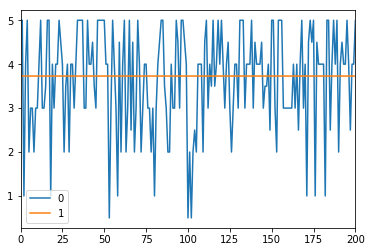

In [28]:
pred_df.plot(xlim=(0,200))